In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
37920,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21036,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1219,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5948,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28744,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


label    7
Name: 33832, dtype: int64


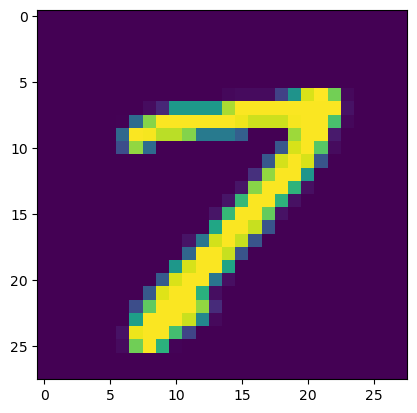

In [4]:
num=np.array(data.iloc[33832,1:]).reshape(28,28)
print(data.iloc[33832,0:1])
plt.imshow(num)

## Splitting data for testing and training.

In [6]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=37)

In [7]:
x_train.shape

(33600, 784)

In [8]:
y_train.shape

(33600,)

### Calculating Accuracy

In [10]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
acc1 = accuracy_score(y_test, y_pred)
acc1

0.9676190476190476

#  PCA

In [12]:
scaler = StandardScaler()

In [13]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
pca = PCA(n_components=100)  #taking 100 principal components

In [15]:
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [16]:
print(x_train.shape)
print(x_train_trf.shape)
print(y_train.shape)

(33600, 784)
(33600, 100)
(33600,)


In [17]:
knn = KNeighborsClassifier()
knn.fit(x_train_trf,y_train)
y_pred = knn.predict(x_test_trf)
acc2 = accuracy_score(y_test, y_pred)
acc2

0.9520238095238095

In [18]:
'''the below function can be used to check accuracy score with i no of principal components 1<=i<=784'''
# max_acc=0;
# corr_ind=0;
# for i in range(1,785):
#     pca=PCA(n_components=i)
#     x_train_trf = pca.fit_transform(x_train)
#     x_test_trf = pca.transform(x_test)
#     knn=KNeighborsClassifier()
#     knn.fit(x_train_trf,y_train)
#     y_pred=knn.predict(x_test_trf)
#     acc=accuracy_score(y_test,y_pred);
#     print(corr_ind, max_acc)

'the below function can be used to check accuracy score with i no of principal components 1<=i<=784'

## Reducing dimensionality to 3

### PC=3 that is 3D data

In [21]:
pca=PCA(n_components=3)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)
x_train_trf

array([[-3.34585778,  4.68836534, -6.50953449],
       [-0.16484505, -1.91765734,  2.42722075],
       [-3.82014555, -5.5844718 ,  1.91679608],
       ...,
       [-8.36239894, -0.73609867,  1.88619228],
       [ 1.44837143,  3.75980899, -5.74287846],
       [-2.90524468,  2.66692893,  1.96474401]])

In [22]:
pca.explained_variance_   #eigen values (3 highest in all 784)

array([40.78440062, 29.16890094, 26.74804783])

In [23]:
pca.components_.shape    #(eigen vectors each having 784 componexts) i.e. 784 Dimensional vectors

(3, 784)

## Finding optimum number of principal componenet 

In [25]:
pca.explained_variance_ratio_

array([0.05776655, 0.04131449, 0.03788563])

In [26]:
sum(pca.explained_variance_ratio_)*100   #not suffectien it should be at least 90

13.696667332873263

In [27]:
pca=PCA(n_components=None)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [28]:
pca.components_.shape 

(784, 784)

In [29]:
pca.explained_variance_ratio_

array([5.77665535e-02, 4.13144941e-02, 3.78856258e-02, 2.94963055e-02,
       2.55357935e-02, 2.23555887e-02, 1.95993783e-02, 1.78429311e-02,
       1.57310356e-02, 1.42792113e-02, 1.36934168e-02, 1.22943553e-02,
       1.13453892e-02, 1.11674098e-02, 1.05454957e-02, 1.01442563e-02,
       9.59113721e-03, 9.38782224e-03, 9.08328041e-03, 8.83746918e-03,
       8.40296199e-03, 8.15893518e-03, 7.80533212e-03, 7.54593734e-03,
       7.32369176e-03, 7.00629179e-03, 6.91512254e-03, 6.70521295e-03,
       6.32248003e-03, 6.14880145e-03, 6.09024912e-03, 6.04535711e-03,
       5.88490224e-03, 5.82339224e-03, 5.77745293e-03, 5.64420230e-03,
       5.47047667e-03, 5.40157664e-03, 5.23487418e-03, 5.07019920e-03,
       4.93860801e-03, 4.85654204e-03, 4.81920808e-03, 4.65441180e-03,
       4.65154657e-03, 4.56597239e-03, 4.48614023e-03, 4.47649680e-03,
       4.39525955e-03, 4.34200648e-03, 4.28490292e-03, 4.22173357e-03,
       4.08887096e-03, 4.04871597e-03, 3.98974599e-03, 3.95357562e-03,
      

In [30]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05776655, 0.09908105, 0.13696667, 0.16646298, 0.19199877,
       0.21435436, 0.23395374, 0.25179667, 0.26752771, 0.28180692,
       0.29550033, 0.30779469, 0.31914008, 0.33030749, 0.34085298,
       0.35099724, 0.36058838, 0.3699762 , 0.37905948, 0.38789695,
       0.39629991, 0.40445885, 0.41226418, 0.41981012, 0.42713381,
       0.4341401 , 0.44105522, 0.44776044, 0.45408292, 0.46023172,
       0.46632197, 0.47236732, 0.47825223, 0.48407562, 0.48985307,
       0.49549727, 0.50096775, 0.50636933, 0.5116042 , 0.5166744 ,
       0.52161301, 0.52646955, 0.53128876, 0.53594317, 0.54059472,
       0.54516069, 0.54964683, 0.55412333, 0.55851858, 0.56286059,
       0.56714549, 0.57136723, 0.5754561 , 0.57950481, 0.58349456,
       0.58744814, 0.5913632 , 0.59516107, 0.59887769, 0.60255314,
       0.60619795, 0.60979853, 0.61330631, 0.61676005, 0.62018535,
       0.62355644, 0.62691832, 0.63026033, 0.63357589, 0.63680157,
       0.6400022 , 0.64317668, 0.64633212, 0.64945394, 0.65251

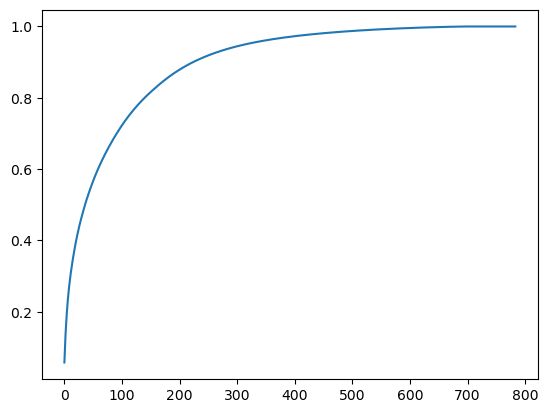

In [31]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

### Creating function to find i for which cumulative sum is in between 90-91

In [33]:
arr= np.cumsum(pca.explained_variance_ratio_)
low, high, ans= 0,len(arr)-1,-1
while low<=high:
    mid=low+(high-low)//2
    if arr[mid]>0.90 and arr[mid]<0.905:
       ans = mid
       break;
    elif(arr[mid]<0.90):
        low=mid+1
    else:
        high=mid-1

print(ans,":",arr[ans])
    

225 : 0.9013514115101487


### Checking accuracy after applying PCA

In [35]:
pca=PCA(n_components=ans+1)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)
knn = KNeighborsClassifier()
knn.fit(x_train_trf, y_train)
y_pred = knn.predict(x_test_trf)
acc = accuracy_score(y_test, y_pred)
acc

0.9457142857142857